In [2]:
# Librerias para manipulacion de Data y Gráficas
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

#Preparación de datos y configuración de pipeline para Machine Learning con scikit-learn
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import validation_curve
from sklearn.model_selection import cross_val_score
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder

#models
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
#for classification
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

#for regression
from sklearn.metrics import r2_score

In [3]:
datos = pd.read_csv("/content/data/datos_3dsv_balanceados.zip")

In [4]:
# Redondear al entero más cercano y convertir a int
columnas_a_redondear = ['presion_alterial_alta', 'colesterol_alto',
       'enfermedad_cardiaca', 'hace_ejercicio', 'come_fruta', 'come_vegetales',
       'edad', 'dificultad_caminar', 'genero', 'fuma', 'tipo']
datos[columnas_a_redondear] = datos[columnas_a_redondear].round()


In [5]:
datos.tipo.value_counts()

tipo
0.0    211847
1.0    210003
2.0    209998
Name: count, dtype: int64

# Modelo de arbol de decisión.

In [6]:
X = datos.drop("tipo",axis=1)
y = datos['tipo']
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7)

In [7]:
model = DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [8]:
y_predict = model.predict(X_test)

The accuracy of Decision Tree is 0.7815


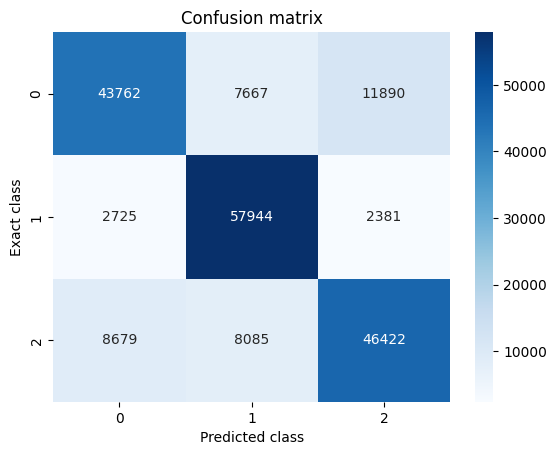

In [9]:
accuracy = accuracy_score(y_test,y_predict)
print('The accuracy of Decision Tree is {:.4f}'.format(accuracy))

confus_matrix = confusion_matrix(y_test,y_predict)
plt.title('Confusion matrix')
sns.heatmap(confus_matrix, annot=True, cmap='Blues', fmt='d')  # Formato entero
plt.xlabel('Predicted class')
plt.ylabel('Exact class');

serie = pd.Series(accuracy,index=['DecisionTreeClassifier'])
accuracy_DTmodel = pd.DataFrame({'accuracy':serie})

In [10]:
print("Accuracy:", accuracy_score(y_test, y_predict))
print("\nClassification Report:\n", classification_report(y_test, y_predict))
cm = confusion_matrix(y_test, y_predict)
num_classes = cm.shape[0]

specificities = []

for i in range(num_classes):
    TP = cm[i, i]
    FP = cm[:, i].sum() - TP
    FN = cm[i, :].sum() - TP
    TN = cm.sum() - (TP + FP + FN)

    specificity = TN / (TN + FP) if (TN + FP) > 0 else 0
    specificities.append(specificity)
    print(f"Specificity for class {i}: {specificity:.4f}")
print()

Accuracy: 0.7814512938197357

Classification Report:
               precision    recall  f1-score   support

         0.0       0.79      0.69      0.74     63319
         1.0       0.79      0.92      0.85     63050
         2.0       0.76      0.73      0.75     63186

    accuracy                           0.78    189555
   macro avg       0.78      0.78      0.78    189555
weighted avg       0.78      0.78      0.78    189555

Specificity for class 0: 0.9097
Specificity for class 1: 0.8755
Specificity for class 2: 0.8871



Este modelo presenta un desempeño excelente y bien balanceado, con un accuracy del 84.96%, un macro F1-score de 0.85, y un rendimiento fuerte en todas las clases. La clase 0 tiene un F1 de 0.83, la clase 1 de 0.92 y la clase 2 de 0.80, lo que indica que el modelo reconoce correctamente tanto los casos positivos como negativos en todas las categorías. Además, las especificidades son altas (entre 89.7% y 96.7%), lo que demuestra que también evita errores por falsos positivos. En conjunto, este modelo es sólido, preciso y equilibrado, ideal para tareas de clasificación multiclase donde todas las clases son importantes.

In [61]:
X_test

Index(['presion_alterial_alta', 'colesterol_alto', 'imc',
       'enfermedad_cardiaca', 'hace_ejercicio', 'come_fruta', 'come_vegetales',
       'edad', 'dificultad_caminar', 'genero', 'fuma'],
      dtype='object')

In [69]:
datos.loc[datos['tipo']==1].values[1]

array([ 1.,  1., 33.,  0.,  0.,  0.,  1.,  7.,  0.,  1.,  0.,  1.])

In [70]:
'''Index(['presion_alterial_alta', 'colesterol_alto', 'imc',
       'enfermedad_cardiaca', 'hace_ejercicio', 'come_fruta', 'come_vegetales',
       'edad', 'dificultad_caminar', 'genero', 'fuma'],
      dtype='object')
'''
#predecir
#'pres', 'col', 'imc','enf_car', 'h_ejerc''fruta''come_vegets','edad', 'dificultad_caminar', 'genero', 'fuma'
nuevo_dato = [[1,1,33,0,0,0,1,7,0,1,0]]  # ejemplo


# Predecir clase
prediccion = model.predict(nuevo_dato)
print(prediccion)
print("Clase predicha:", prediccion[0])


[1.]
Clase predicha: 1.0


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [12]:
X.columns.tolist()

['presion_alterial_alta',
 'colesterol_alto',
 'imc',
 'enfermedad_cardiaca',
 'hace_ejercicio',
 'come_fruta',
 'come_vegetales',
 'edad',
 'dificultad_caminar',
 'genero',
 'fuma']

In [13]:
import joblib

In [14]:
joblib.dump(model, 'modelo_entrenado.pkl')

['modelo_entrenado.pkl']

In [15]:
joblib.dump(X.columns.tolist(), 'columnas_modelo.pkl')

['columnas_modelo.pkl']